# Computer Vision Assignment

> Objective 1: Count the number of rice grains in the Image.<br>
Objective 2: Find the percentage of broken grains in the image.

In [1]:
!unzip rice_images.zip

Archive:  rice_images.zip
  inflating: rice_images/broken_grain_1.jpg  
  inflating: rice_images/broken_grain_2.jpg  
  inflating: rice_images/broken_grain_3.jpg  
  inflating: rice_images/full_grain_1.jpg  
  inflating: rice_images/full_grain_2.jpg  
  inflating: rice_images/full_grain_4.jpg  
  inflating: rice_images/full_grain_5.jpg  
  inflating: rice_images/full_grain_6.jpg  
  inflating: rice_images/full_grain_7.jpg  
  inflating: rice_images/mixed_grain_1.jpg  
  inflating: rice_images/mixed_grain_2.jpg  
  inflating: rice_images/mixed_grains_3.jpg  


### Importing some useful libraries

In [ ]:
import cv2
import os
import numpy as np

from google.colab.patches import cv2_imshow

### Getting all images and categorizing it into full, broken mixed rice grain images

In [85]:
all_rice_images = os.listdir('rice_images')
mixed_grain, full_grain, broken_grain =[],[],[]

for i in all_rice_images:
  if 'mixed' in i:
    mixed_grain.append(i)
  if 'full' in i:
    full_grain.append(i)
  if 'broken' in i:
    broken_grain.append(i)

### Image processing

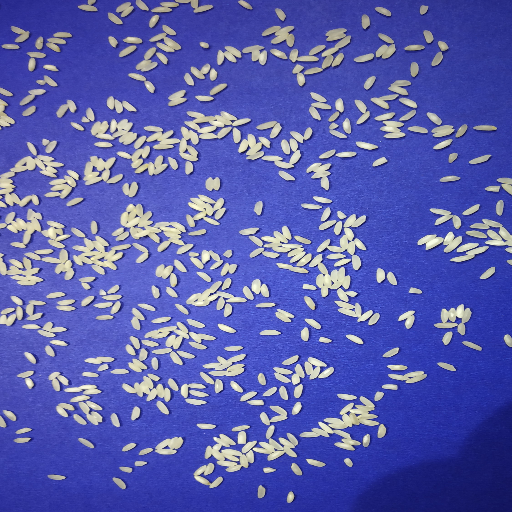

In [107]:
root_dir = 'rice_images/'

#Reading full grain image
image = cv2.imread(root_dir+full_grain[0]) #Reading it in a gray scale
image = cv2.resize(image,(512,512)) #Resizing it
cv2_imshow(image)

* We can see that in above images there are white rice grains and blue background and some black shadow(in bottom right corner).
* So to remove or avoid unnecessary background, we'll be using only gray scale images.

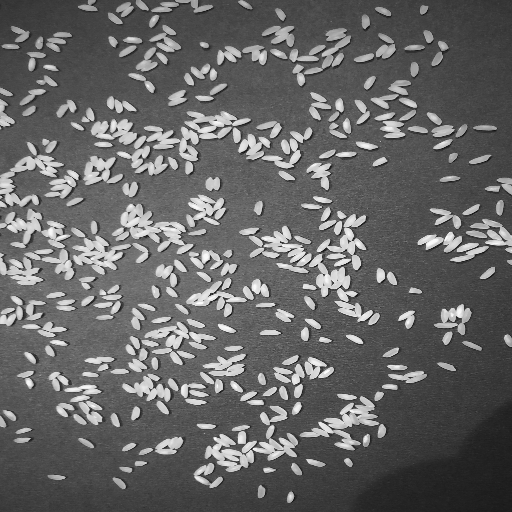

In [108]:
#Reading full grain image
image = cv2.imread(root_dir+full_grain[0],0) #Reading it in a gray scale
image = cv2.resize(image,(512,512)) #Resizing it
cv2_imshow(image)

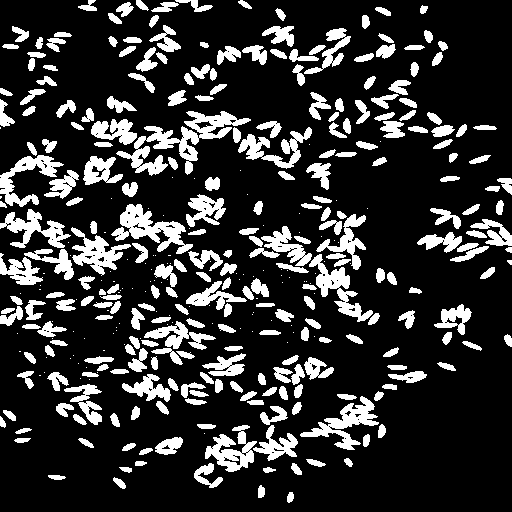

In [113]:
#Binary threshold

thresh, output_binthresh = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
cv2_imshow(output_binthresh)

* Rice grain pixels are brighter than background pixels which are darker.
* For simplicity we used fixed threaholdof 127 but looking at the output we do realize that quite a few background pixels have been marked white.

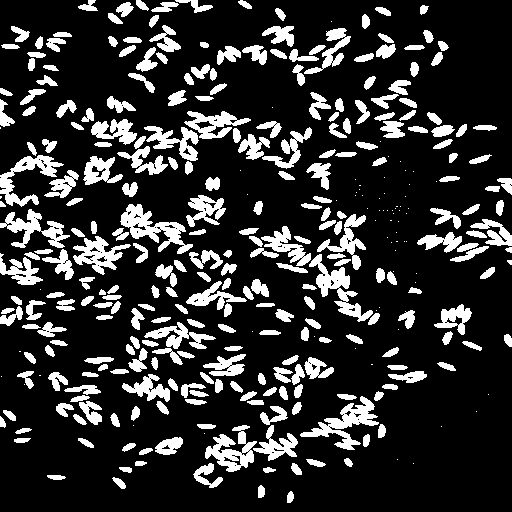

In [114]:
#Adaptive Thresholding with ADAPTIVE_THRESH_MEAN_C

output_adapthresh = cv2.adaptiveThreshold (image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 51, -20.0)
cv2_imshow(output_adapthresh)

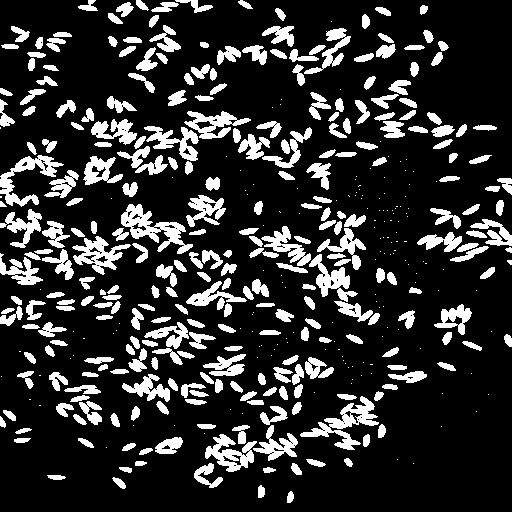

In [115]:
#Adaptive Thresholding with ADAPTIVE_THRESH_GAUSSIAN_C

output_adapthresh = cv2.adaptiveThreshold (image, 255.0, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 51, -20.0)
cv2_imshow(output_adapthresh)

* We have experimented with adpative thresholding using both mean and guassian thresholding.
* By visualizing above images, we can say mean adaptive threshold works better as it is able to avoid some extra unncessary pixel as white in in image.

### Finding total number of rice grains from preprocessed image by finding contours from it

Number of rice grains detected: 440


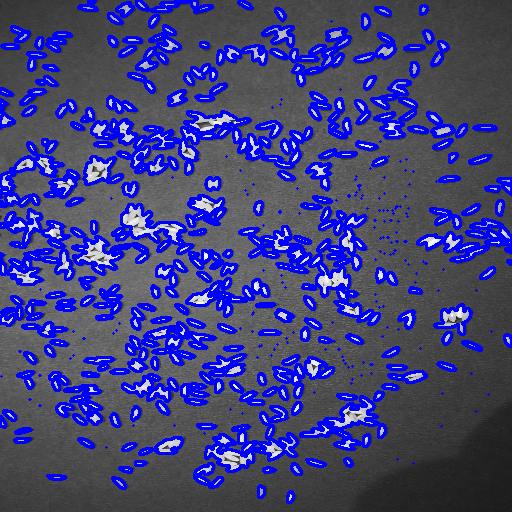

In [125]:
#Finding contours from outpur adapthreshold image and that contours will be rice grains
contours, _ = cv2.findContours(output_adapthresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
output_contour = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
#Drawing fetched contours on original image in green color
cv2.drawContours(output_contour, contours, -1, (255, 0, 0), 2)
print('Number of rice grains detected:', len(contours))
cv2_imshow(output_contour)

* As shown, we are able to count most of the rice grains from an image.
* Although some background pixels are also counted as images.
* And highly overlapped rice grains are also not detected.

After finding total number of rice grains from an image, mow our objective is to find percentage of broken rice grains from an image.<br>
To do so, we will find area of contour for both full grain and broken grain and then we will set the threshold area for full and broken rice grains. 

In [132]:
def count_rice_grains(path):
  '''
  This function accept path of image and returns the contour for rice grains in an image
  '''
  #Reading image
  image = cv2.imread(root_dir+path,0) #Reading it in a gray scale
  image = cv2.resize(image,(512,512)) #Resizing it

  #Adaptive Thresholding with ADAPTIVE_THRESH_MEAN_C
  output_adapthresh = cv2.adaptiveThreshold (image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 51, -20.0)

  #Finding contours from outpur adapthreshold image and that contours will be rice grains
  contours, _ = cv2.findContours(output_adapthresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  
  return contours

In [134]:
len(count_rice_grains(full_grain[1]))

197

In [155]:
#Finding area of rice grain contour for both full and broken grain images
full_grain_contour_area_lst, broken_grain_contour_area_lst = [], []

#Finding area of all full rice grain from all full grain containing rice image
for i in full_grain:
  contours = count_rice_grains(i)
  for cnt in contours:
    temp = cv2.contourArea(cnt)
    full_grain_contour_area_lst.append(temp)

#Finding area of all broken rice grain from all full broken containing rice image
for i in broken_grain:
  contours = count_rice_grains(i)
  for cnt in contours:
    temp = cv2.contourArea(cnt)
    broken_grain_contour_area_lst.append(temp)

* We have calculated all full grainf and broken grain contour area.
* Now we will find threshold area for broken grain.

> We know that our rice counter system, counts most of the rice grain but also fails for highly overlapped rice grains.

> And also count some background pixel as rice grain that might be due to background noise or something like that.

> So we can say, there is an outlier/incoreection in detected rice grains.

> The incorrection can be a small background pixel that got counted as rice grains or large bunch or rice grains that got counted as single rice grains.

In [164]:
print('Mean area of full rice grain:',np.mean(full_grain_contour_area_lst))
print('Medain area of full rice grain:',np.median(full_grain_contour_area_lst))
print()
print('Mean area of broken rice grain:',np.mean(broken_grain_contour_area_lst))
print('Medain area of broken rice grain:',np.median(broken_grain_contour_area_lst))

Mean area of full rice grain: 104.77685521536067
Medain area of full rice grain: 47.5

Mean area of broken rice grain: 68.82412587412587
Medain area of broken rice grain: 36.0


* We know that median tends to work better than mean in case of outlier removal.
* But we have also observed that here we are having few large outliers but most of the small outlier which is nothing but background pixel.
* So, we will use mean rice grain area to find the total percetage of rice grain from an image.

In [169]:
#Setting threshold for broken rice grain
broken_grain_theshold = 48

### Finding number of rice grains and total percentage of broken rice grain in an image

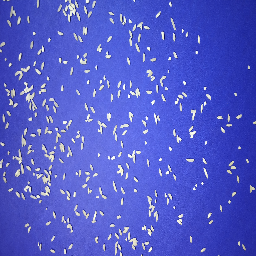


Total number of rice grains: 418

Total percentage of broken rice grains: 75.60 %


In [177]:
#Input image 1

input_path = mixed_grain[0]
cv2_imshow(cv2.resize(cv2.imread(root_dir+input_path),(256,256)))

contours = count_rice_grains(input_path)
n_rice_grain = len(contours)
print()
print('Total number of rice grains:',n_rice_grain)

#Finding percentage of broken rice grains
n_broken_rice_grain = 0
for cnt in contours:
    temp = cv2.contourArea(cnt)
    if temp < broken_grain_theshold:
      n_broken_rice_grain += 1

print()
per = n_broken_rice_grain*100/n_rice_grain
print('Total percentage of broken rice grains:','%.2f' % per,'%')

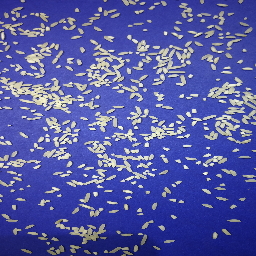


Total number of rice grains: 381

Total percentage of broken rice grains: 36.22 %


In [178]:
#Input image 2

input_path = mixed_grain[1]
cv2_imshow(cv2.resize(cv2.imread(root_dir+input_path),(256,256)))

contours = count_rice_grains(input_path)
n_rice_grain = len(contours)
print()
print('Total number of rice grains:',n_rice_grain)

#Finding percentage of broken rice grains
n_broken_rice_grain = 0
for cnt in contours:
    temp = cv2.contourArea(cnt)
    if temp < broken_grain_theshold:
      n_broken_rice_grain += 1

print()
per = n_broken_rice_grain*100/n_rice_grain
print('Total percentage of broken rice grains:','%.2f' % per,'%')

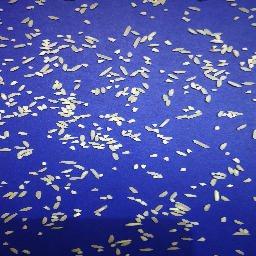


Total number of rice grains: 299

Total percentage of broken rice grains: 28.09 %


In [179]:
#Input image 3

input_path = mixed_grain[2]
cv2_imshow(cv2.resize(cv2.imread(root_dir+input_path),(256,256)))

contours = count_rice_grains(input_path)
n_rice_grain = len(contours)
print()
print('Total number of rice grains:',n_rice_grain)

#Finding percentage of broken rice grains
n_broken_rice_grain = 0
for cnt in contours:
    temp = cv2.contourArea(cnt)
    if temp < broken_grain_theshold:
      n_broken_rice_grain += 1

print()
per = n_broken_rice_grain*100/n_rice_grain
print('Total percentage of broken rice grains:','%.2f' % per,'%')

* We are able to find total number of rice grains and total percentage of broken rice grains from an image.
* But here all the background pixel which got detected as rice grain will be considered as broken rice grains only.
* For that reason, broken rice grain percentage will be little higher.

### Creating python script that takes an image path as command-line input and prints out the number of rice grains and percentage of broken grains.

In [217]:
%%writefile count_grains.py

import cv2
import numpy as np
import argparse

#Constructing the argument parser and parse the arguments
ap = argparse.ArgumentParser()
ap.add_argument("-i", "--image_path", required=True, help="path to input image")
args = vars(ap.parse_args())

def main():

  #Reading image
  image = cv2.imread(args['image_path'],0) #Reading it in a gray scale
  image = cv2.resize(image,(512,512)) #Resizing it

  #Adaptive Thresholding with ADAPTIVE_THRESH_MEAN_C
  output_adapthresh = cv2.adaptiveThreshold (image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 51, -20.0)

  #Finding contours from outpur adapthreshold image and that contours will be rice grains
  contours, _ = cv2.findContours(output_adapthresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

  n_rice_grain = len(contours)
  print('Total number of rice grains:',n_rice_grain)

  #Finding percentage of broken rice grains
  broken_grain_theshold = 48
  n_broken_rice_grain = 0
  for cnt in contours:
    temp = cv2.contourArea(cnt)
    if temp < broken_grain_theshold:
      n_broken_rice_grain += 1

  per = n_broken_rice_grain*100/n_rice_grain
  print('Total percentage of broken rice grains:','%.2f' % per,'%')

if __name__=="__main__":
    main()

Writing count_grains.py


In [216]:
!python count_grains.py -i rice_images/mixed_grain_2.jpg

Total number of rice grains: 299
Total percentage of broken rice grains: 28.09 %


* We wrote python script which accepts image path as command-line argument and prints total number of rice grains and total percentage of broken rice grains.

### Limitation

* This system fails for highly overlapped rice grains and noisy images.
* Some background pixels got counted as rice grain.
* When finding total % of broken grains, those background pixel is considered as broken grains.

### Future Improvements

* We can train whole deep learning model to detect rice grain which will be much accurate than this.
* But for that we need large number of labeled images.
* We can also experiment with more image thresholding and preprocessing.